# Logistic Regression

You are provided with a dataset available in the Google Drive folder at the following link:
https://drive.google.com/drive/folders/1NB2zIk679jlZC1x0gZPS4ugfHIO1aq1p

The dataset contains information related to social network advertisements, including user attributes such as age and estimated salary, along with a binary target variable indicating whether a user purchased the advertised product or not.

The goal is to build a Logistic Regression classification model to predict whether a user will purchase the advertised product based on their Age and Estimated Salary.

Perform the following tasks:

## Importing the libraries

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Importing the dataset

In [10]:
data_stuff = pd.read_csv("Social_Network_Ads.csv")
print(data_stuff)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


## Select Features and Target Variable



In [11]:
#First remove the userID from data set
data_stuff = data_stuff.drop("User ID", axis = 1)
print(data_stuff)

     Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]


In [12]:
#Next, change the gender data into numerical data, assigning -1 to Male and 1 to Female
data_stuff["Gender"] = data_stuff["Gender"].map({"Male": -1, "Female": 1})
print(data_stuff)

     Gender  Age  EstimatedSalary  Purchased
0        -1   19            19000          0
1        -1   35            20000          0
2         1   26            43000          0
3         1   27            57000          0
4        -1   19            76000          0
..      ...  ...              ...        ...
395       1   46            41000          1
396      -1   51            23000          1
397       1   50            20000          1
398      -1   36            33000          0
399       1   49            36000          1

[400 rows x 4 columns]


In [13]:
#Defining the target and the features
features = data_stuff.drop("Purchased", axis = 1).values
targets = data_stuff["Purchased"].values
print(features)
print(targets)

[[   -1    19 19000]
 [   -1    35 20000]
 [    1    26 43000]
 ...
 [    1    50 20000]
 [   -1    36 33000]
 [    1    49 36000]]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


## Splitting the dataset into the Training set and Test set

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, stratify=targets)
print(x_train, x_test, y_train, y_test)

[[    -1     41  52000]
 [    -1     28  79000]
 [     1     47  49000]
 [     1     39  75000]
 [     1     36 126000]
 [    -1     26  81000]
 [    -1     40  71000]
 [    -1     59 130000]
 [    -1     25  22000]
 [    -1     27  89000]
 [     1     31  89000]
 [    -1     31  66000]
 [     1     32  86000]
 [    -1     35  75000]
 [     1     39  59000]
 [    -1     28 123000]
 [     1     36  75000]
 [     1     35  77000]
 [     1     35  97000]
 [     1     26  17000]
 [    -1     26  86000]
 [    -1     40  59000]
 [    -1     26  15000]
 [    -1     31  18000]
 [    -1     57  74000]
 [    -1     36 118000]
 [    -1     42  64000]
 [    -1     40  57000]
 [     1     43 112000]
 [    -1     20  86000]
 [    -1     25  87000]
 [     1     41  60000]
 [    -1     38  61000]
 [     1     34  72000]
 [    -1     19  85000]
 [     1     27  31000]
 [    -1     48  90000]
 [     1     26  72000]
 [    -1     29  61000]
 [     1     26 118000]
 [     1     57  26000]
 [     1     46 

## Feature Scaling

In [16]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)
print(x_train_s)
print(x_test_s)

[[-0.97530483  0.31399546 -0.54136886]
 [-0.97530483 -0.93358917  0.25249179]
 [ 1.02532046  0.88980375 -0.6295756 ]
 [ 1.02532046  0.12205936  0.1348828 ]
 [ 1.02532046 -0.16584478  1.63439736]
 [-0.97530483 -1.12552527  0.31129628]
 [-0.97530483  0.21802741  0.01727382]
 [-0.97530483  2.04142033  1.75200635]
 [-0.97530483 -1.22149332 -1.42343624]
 [-0.97530483 -1.02955722  0.54651425]
 [ 1.02532046 -0.64568503  0.54651425]
 [-0.97530483 -0.64568503 -0.12973741]
 [ 1.02532046 -0.54971698  0.45830751]
 [-0.97530483 -0.26181283  0.1348828 ]
 [ 1.02532046  0.12205936 -0.33555313]
 [-0.97530483 -0.93358917  1.54619062]
 [ 1.02532046 -0.16584478  0.1348828 ]
 [ 1.02532046 -0.26181283  0.1936873 ]
 [ 1.02532046 -0.26181283  0.78173222]
 [ 1.02532046 -1.12552527 -1.57044748]
 [-0.97530483 -1.12552527  0.45830751]
 [-0.97530483  0.21802741 -0.33555313]
 [-0.97530483 -1.12552527 -1.62925197]
 [-0.97530483 -0.64568503 -1.54104523]
 [-0.97530483  1.84948423  0.10548056]
 [-0.97530483 -0.16584478

## Training the Logistic Regression model on the Training set

In [18]:
reg = linear_model.LogisticRegression()
reg.fit(x_train_s, y_train)

LogisticRegression()

## Predicting the Test set results

In [20]:
y_predicted = reg.predict(x_test_s)
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print()
for i in range(len(y_predicted)):
  print(y_test[i], y_predicted[i])

Accuracy:  0.8875

0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
1 1
0 0
1 0
0 0
1 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
1 1
1 0
1 1
1 0
0 0
0 0
0 0
1 0
1 1
0 0
1 0
0 0
1 1
1 1
1 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
1 1
0 0
1 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1


## Making the Confusion Matrix

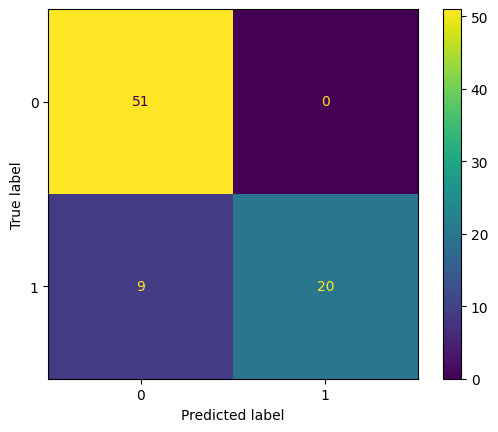

In [23]:
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Visualising the Training set results

164 164 164


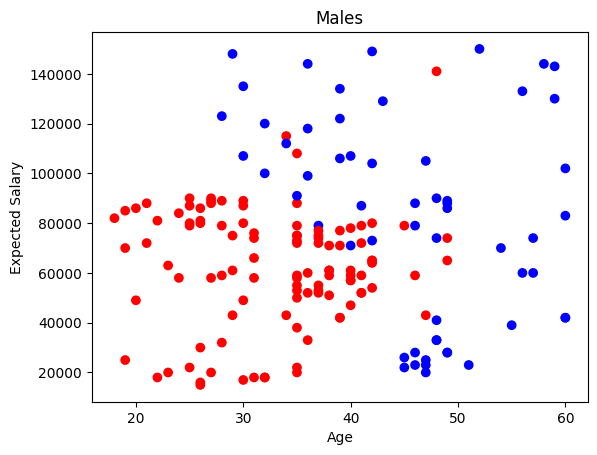

164 156 156


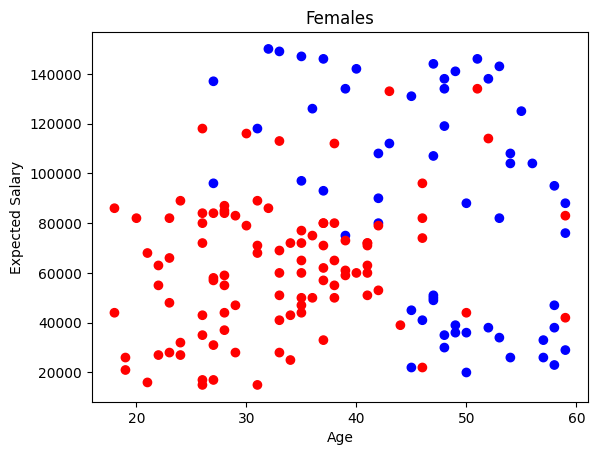

In [44]:
#for males
xs1 = [i[1] for i in x_train if i[0] == -1]
xs2 = [i[2] for i in x_train if i[0] == -1]
ys = [y_train[i] for i in range(len(y_train)) if x_train[i][0] == -1]
colours = [{1:"blue", 0:"red"}[i] for i in ys]
print(len(xs), len(ys), len(colours))
plt.scatter(xs1, xs2, color = colours)
plt.title("Males")
plt.xlabel("Age")
plt.ylabel("Expected Salary")
plt.show()

#for females
xs1 = [i[1] for i in x_train if i[0] == 1]
xs2 = [i[2] for i in x_train if i[0] == 1]
ys = [y_train[i] for i in range(len(y_train)) if x_train[i][0] == 1]
colours = [{1:"blue", 0:"red"}[i] for i in ys]
print(len(xs), len(ys), len(colours))
plt.scatter(xs1, xs2, color = colours)
plt.title("Females")
plt.xlabel("Age")
plt.ylabel("Expected Salary")
plt.show()

#red means not purchased while blue means purchased


## Visualising the Test set results

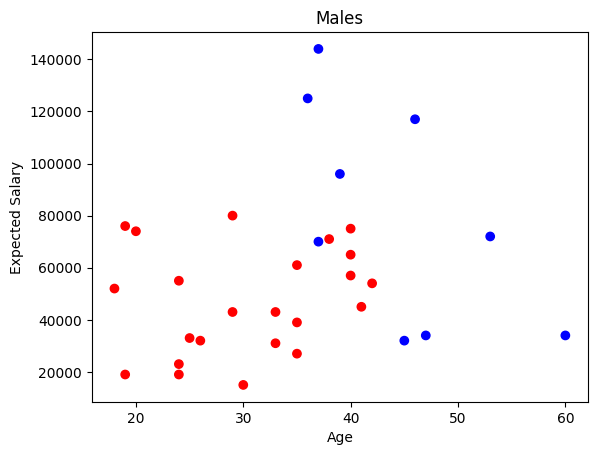

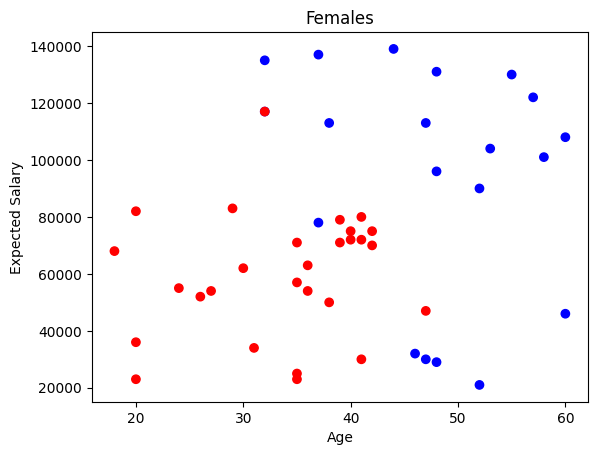

In [46]:
#for males
xs1 = [i[1] for i in x_test if i[0] == -1]
xs2 = [i[2] for i in x_test if i[0] == -1]
ys = [y_test[i] for i in range(len(y_test)) if x_test[i][0] == -1]
colours = [{1:"blue", 0:"red"}[i] for i in ys]
plt.scatter(xs1, xs2, color = colours)
plt.title("Males")
plt.xlabel("Age")
plt.ylabel("Expected Salary")
plt.show()

#for females
xs1 = [i[1] for i in x_test if i[0] == 1]
xs2 = [i[2] for i in x_test if i[0] == 1]
ys = [y_test[i] for i in range(len(y_test)) if x_test[i][0] == 1]
colours = [{1:"blue", 0:"red"}[i] for i in ys]
plt.scatter(xs1, xs2, color = colours)
plt.title("Females")
plt.xlabel("Age")
plt.ylabel("Expected Salary")
plt.show()

#red means not purchased while blue means purchased